# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [3]:
df_a=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/performance_data/5_a.csv')

In [ ]:
df_a.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [4]:
df_a['label'] = df_a['proba'].apply(lambda x: 0 if x < 0.5 else 1)

In [5]:
TP = FP = TN = FN = 0
df_a['TP'] = np.where((df_a['y'] == 1) & (df_a['y'] == df_a['label']),1,0)
df_a['TN'] = np.where((df_a['y'] == 0) & (df_a['y'] == df_a['label']),1,0)
df_a['FP'] = np.where((df_a['y'] == 0) & (df_a['label'] == 1),1,0)
df_a['FN'] = np.where((df_a['y'] == 1) & (df_a['label'] == 0),1,0)
TP = df_a['TP'].sum()
TN = df_a['TN'].sum()
FP = df_a['FP'].sum()
FN = df_a['FN'].sum()

In [6]:
confusion_matrix = np.matrix([[TN, FN], [FP, TP]])

In [7]:
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [8]:
F1_Score = 2 * ((precision*recall)/(precision+recall))
accuracy_score = (TN+TP)/(TP+FP+TN+FN)

In [9]:
unique_prob = df_a['proba'].sort_values(ascending=False).unique()
tpr_array = []
fpr_array = []

In [10]:
for i in unique_prob:
  df_a['prob_label'] = df_a['proba'].apply(lambda x: 0 if x < i else 1)
  df_a['t_TP'] = np.where((df_a['y'] == 1) & (df_a['y'] == df_a['prob_label']),1,0)
  df_a['t_TN'] = np.where((df_a['y'] == 0) & (df_a['y'] == df_a['prob_label']),1,0)
  df_a['t_FP'] = np.where((df_a['y'] == 0) & (df_a['prob_label'] == 1),1,0)
  df_a['t_FN'] = np.where((df_a['y'] == 1) & (df_a['prob_label'] == 0),1,0)
  t_TP = df_a['t_TP'].sum()
  t_TN = df_a['t_TN'].sum()
  t_FP = df_a['t_FP'].sum()
  t_FN = df_a['t_FN'].sum()
  tpr = t_TP / (t_TP+t_FN)
  fpr = t_FP / (t_TN+t_FP)
  tpr_array.append(tpr)
  fpr_array.append(fpr)

In [11]:
AUC_Score = np.trapz(tpr_array,fpr_array)

In [12]:
df_a.drop(['t_TP','t_TN','t_FP','t_FN','TP','TN','FP','FN','prob_label'],axis=1,inplace=True)

In [13]:
print(confusion_matrix,"\n",F1_Score,"\n",accuracy_score,"\n",AUC_Score)

[[    0     0]
 [  100 10000]] 
 0.9950248756218906 
 0.9900990099009901 
 0.48829900000000004


In [14]:
import matplotlib.pyplot as plt

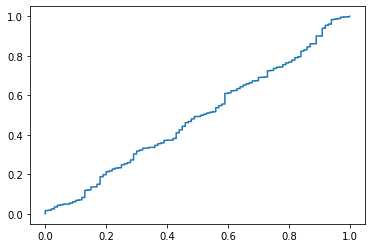

In [17]:
plt.plot(fpr_array,tpr_array)



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [18]:
df_b=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/performance_data/5_b.csv')

In [19]:
df_b['label'] = df_b['proba'].apply(lambda x: 0 if x < 0.5 else 1)

In [20]:
TP = FP = TN = FN = 0
df_b['TP'] = np.where((df_b['y'] == 1) & (df_b['y'] == df_b['label']),1,0)
df_b['TN'] = np.where((df_b['y'] == 0) & (df_b['y'] == df_b['label']),1,0)
df_b['FP'] = np.where((df_b['y'] == 0) & (df_b['label'] == 1),1,0)
df_b['FN'] = np.where((df_b['y'] == 1) & (df_b['label'] == 0),1,0)
TP = df_b['TP'].sum()
TN = df_b['TN'].sum()
FP = df_b['FP'].sum()
FN = df_b['FN'].sum()

In [21]:
confusion_matrix_b = np.matrix([[TN, FN], [FP, TP]])

In [22]:
precision_b = TP/(TP+FP)
recall_b = TP/(TP+FN)

In [23]:
F1_Score_b = 2 * ((precision*recall)/(precision+recall))
accuracy_score_b = (TN+TP)/(TP+FP+TN+FN)

In [24]:
unique_prob = df_b['proba'].sort_values(ascending=False).unique()
tpr_array = []
fpr_array = []

In [25]:
for i in unique_prob:
  df_b['prob_label'] = df_b['proba'].apply(lambda x: 0 if x < i else 1)
  df_b['t_TP'] = np.where((df_b['y'] == 1) & (df_b['y'] == df_b['prob_label']),1,0)
  df_b['t_TN'] = np.where((df_b['y'] == 0) & (df_b['y'] == df_b['prob_label']),1,0)
  df_b['t_FP'] = np.where((df_b['y'] == 0) & (df_b['prob_label'] == 1),1,0)
  df_b['t_FN'] = np.where((df_b['y'] == 1) & (df_b['prob_label'] == 0),1,0)
  t_TP = df_b['t_TP'].sum()
  t_TN = df_b['t_TN'].sum()
  t_FP = df_b['t_FP'].sum()
  t_FN = df_b['t_FN'].sum()
  tpr = t_TP / (t_TP+t_FN)
  fpr = t_FP / (t_TN+t_FP)
  tpr_array.append(tpr)
  fpr_array.append(fpr)

In [ ]:
AUC_Score_b = np.trapz(tpr_array,fpr_array)

In [ ]:
df_b.drop(['t_TP','t_TN','t_FP','t_FN','TP','TN','FP','FN','prob_label'],axis=1,inplace=True)

In [ ]:
print(confusion_matrix,"\n",F1_Score,"\n",accuracy_score,"\n",AUC_Score_b)

[[    0     0]
 [  100 10000]] 
 0.9950248756218906 
 0.9900990099009901 
 0.9377570000000001


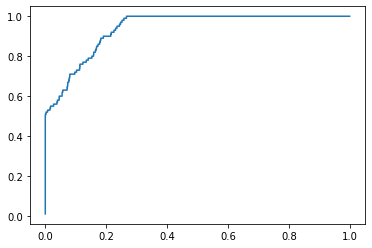

In [27]:
plt.plot(fpr_array,tpr_array)

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
df_c=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/performance_data/5_c.csv')

In [ ]:
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [ ]:
unique_prob = df_c['prob'].sort_values(ascending=False).unique()
best_score = {}

In [ ]:
for i in unique_prob:
  df_c['prob_label'] = df_c['prob'].apply(lambda x: 0 if x < i else 1)
  df_c['t_FP'] = np.where((df_c['y'] == 0) & (df_c['prob_label'] == 1),1,0)
  df_c['t_FN'] = np.where((df_c['y'] == 1) & (df_c['prob_label'] == 0),1,0)
  t_FP = df_c['t_FP'].sum()
  t_FN = df_c['t_FN'].sum()
  score = (500*t_FN)+(100*t_FP)
  best_score[i] = score

In [ ]:
best_score_c = min(best_score,key=best_score.get) 

In [ ]:
best_score_c

0.2300390278970873


## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
df_d=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/performance_data/5_d.csv')

In [ ]:
df_d.head(1)

,y,pred
0,101.0,100.0


In [ ]:
n = len(df_d['y'])
mean_y = df_d['y'].sum()/n

In [ ]:
df_d['diff'] = abs(df_d['pred'] - df_d['y'])
MAE = ((df_d['diff']**2).sum())/n

In [ ]:
MAPE = (df_d['diff'].sum())/(df_d['y'].sum())

In [ ]:
rss_diff = df_d['y'] - df_d['pred']
tss_diff = df_d['y'] - mean_y

In [ ]:
RSS = ((rss_diff)**2).sum()
TSS = ((tss_diff)**2).sum()

In [ ]:
R_sq = 1 - (RSS/TSS)

In [ ]:
print(MAE,"\n",MAPE,"\n",R_sq)

177.16569974554707 
 0.1291202994009687 
 0.9563582786990937
